In [192]:
def is_degenerate(C):
  """
  Checks whether a matrix is degenerate.

  Args:
    C: A NumPy array.

  Returns:
    True if the matrix is degenerate, False otherwise.
  """

  # Check the sum of the costs in each row and column.
  for row in range(C.shape[0]):
    if np.sum(C[row, :]) == 0:
      return True
  for col in range(C.shape[1]):
    if np.sum(C[:, col]) == 0:
      return True

  # The matrix is not degenerate.
  return False

In [193]:
def is_legit(plan, source, target):
  """
  Checks if the plan is legit.

  Args:
    plan: The optimal transport plan.
    source: The source distribution.
    target: The target distribution.

  Returns:
    True if the plan is legit, False otherwise.
  """

  # Check the sum of each row.
  for row in range(plan.shape[0]):
    if np.sum(plan[row, :]) != source[row]:
      return False

  # Check the sum of each column.
  for col in range(plan.shape[1]):
    if np.sum(plan[:, col]) != target[col]:
      return False

  # The plan is legit.
  return True

In [81]:
from utils.Visualizations import *
import numpy as np

#n_p = 100
#n_q = 100
n_p = 4
n_q = 4
n_max = 10000
eps = 1.e-2
X,Y = np.linspace(0,1,n_p), np.linspace(0,1,n_q)

#p = make_1D_gauss(n_p, np.floor(1 * n_p / 4.), 2.) + make_1D_gauss(n_p, np.floor(2 * n_p / 4.), 2.) * (-0.5)
#q = make_1D_gauss(n_q, np.floor(5 * n_q / 8.), 2.) + make_1D_gauss(n_q, np.floor(7 * n_q / 8.), 2.) * (-0.5)

p = np.array([1.0,-1.0,0.0,0.0])
q = np.array([0.0,0.0,-1.0,1.0])

dx = np.ones([n_p,1])/n_p
dy = np.ones([n_q,1])/n_q

C = np.zeros([n_p,n_q],dtype=np.float64)

dist_f1 = lambda a,b : abs(a-b)
dist_f2 = lambda a,b : (a-b)**2
# TODO: look at pdist1, pdist2
for it1 in range(n_p):
    for it2 in range(n_q):
        C[it1,it2] = dist_f1(X[it1],Y[it2])

# C = X - Y.T

#Transport_plan, u, v = full_scalingAlg_pot(p, q, C, eps)

## To work with the signed measures
p_pos = np.zeros(p.shape)
p_neg = np.zeros(p.shape)
q_pos = np.zeros(q.shape)
q_neg = np.zeros(q.shape)

sign_p = np.sign(p)
sign_q = np.sign(q)

p_pos[sign_p>0] = p[sign_p>0]
p_neg[sign_p<0] = -p[sign_p<0]
q_pos[sign_q>0] = q[sign_q>0]
q_neg[sign_q<0] = -q[sign_q<0]

In [82]:
K_t : np.ndarray = np.exp(C / (-eps))

In [83]:
T_cost, logs = ot.emd(p_pos, q_pos, C, eps, log=True)

In [85]:
p_pos

array([1., 0., 0., 0.])

In [86]:
C

array([[0.        , 0.33333333, 0.66666667, 1.        ],
       [0.33333333, 0.        , 0.33333333, 0.66666667],
       [0.66666667, 0.33333333, 0.        , 0.33333333],
       [1.        , 0.66666667, 0.33333333, 0.        ]])

In [70]:
u = logs['u'].flatten()
v = logs['v'].flatten()

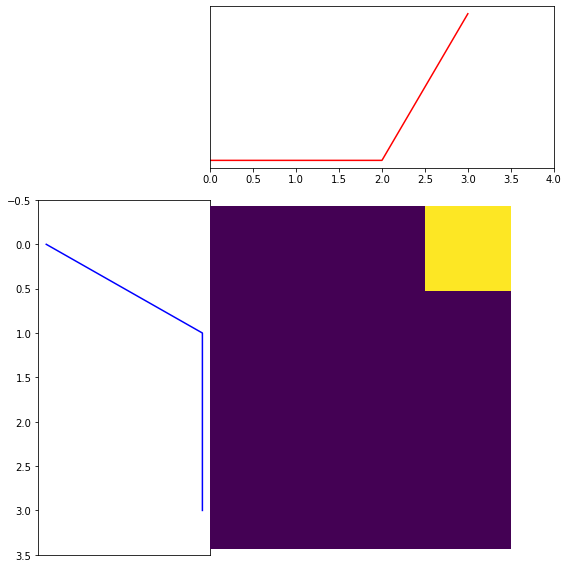

In [76]:
plt.figure(figsize=(8, 8))
plot1D_mat(p_pos, q_pos, T_cost, '')
plt.show()

In [184]:
from utils.Visualizations import *
import numpy as np

n_p = 100
n_q = 100
X,Y = np.linspace(0,1,n_p), np.linspace(0,1,n_q)

p = make_1D_gauss(n_p, np.floor(1 * n_p / 4.), 2.) + make_1D_gauss(n_p, np.floor(2 * n_p / 4.), 2.) * (-0.5)
q = make_1D_gauss(n_q, np.floor(5 * n_q / 8.), 2.) + make_1D_gauss(n_q, np.floor(7 * n_q / 8.), 2.) * (-0.5)

C = np.zeros([n_p,n_q],dtype=np.float64)

dist_f1 = lambda a,b : abs(a-b)
dist_f2 = lambda a,b : (a-b)**2
for it1 in range(n_p):
    for it2 in range(n_q):
        C[it1,it2] = dist_f2(X[it1],Y[it2])


p_pos = np.zeros(p.shape)
p_neg = np.zeros(p.shape)
q_pos = np.zeros(q.shape)
q_neg = np.zeros(q.shape)

sign_p = np.sign(p)
sign_q = np.sign(q)

p_pos[sign_p>0] = p[sign_p>0]
p_neg[sign_p<0] = -p[sign_p<0]
q_pos[sign_q>0] = q[sign_q>0]
q_neg[sign_q<0] = -q[sign_q<0]

In [185]:
K_t : np.ndarray = np.exp(C / (-eps))

In [186]:
p_pos = p_pos.flatten()
q_pos = q_pos.flatten()

In [198]:
T_cost, logs = ot.emd(p_pos, q_pos, C, log=True, )

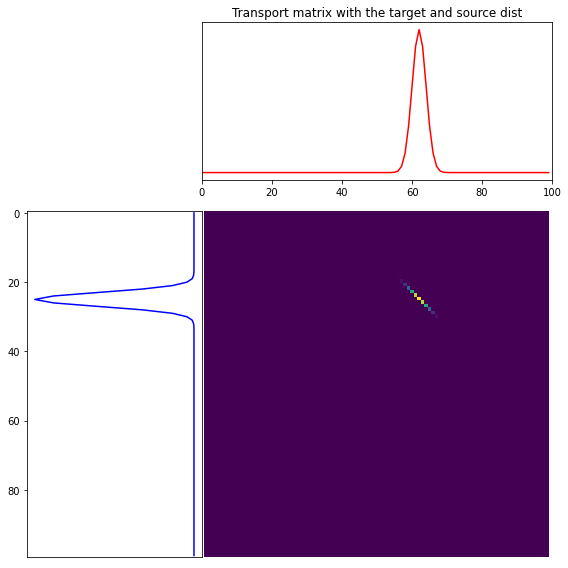

In [199]:
plt.figure(figsize=(8, 8))
plot1D_mat(p_pos, q_pos, T_cost, 'Transport matrix with the target and source dist')
plt.show()

In [202]:
sum(sum(T_cost) - p_pos)

1.3384346820517025e-16

In [178]:
T_sink, logs = ot.sinkhorn(p_pos, q_pos, C, eps, log=True)
u : np.ndarray = logs['u'].flatten()
v : np.ndarray = logs['v'].flatten()
Transport_plan : np.ndarray = np.diag(v) @ K_t @ np.diag(u)

c:\users\eriki\appdata\local\programs\python\python38\lib\site-packages\ot\bregman.py:477: RuntimeWarning: divide by zero encountered in divide
  Kp = (1 / a).reshape(-1, 1) * K
c:\users\eriki\appdata\local\programs\python\python38\lib\site-packages\ot\bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


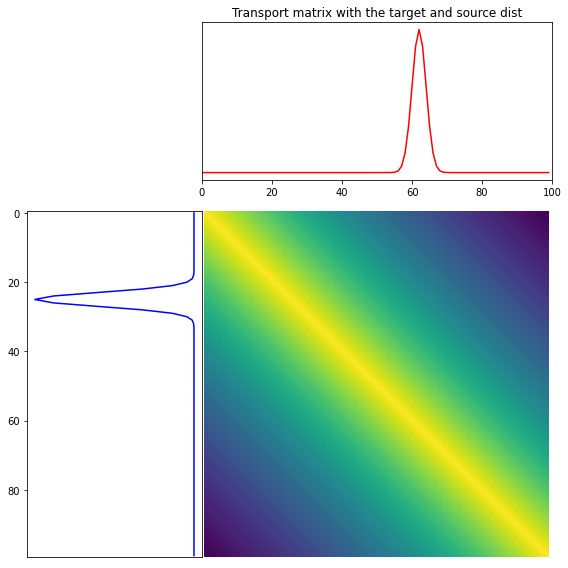

In [180]:
plt.figure(figsize=(8, 8))
plot1D_mat(p_pos, q_pos, Transport_plan, 'Transport matrix with the target and source dist')
plt.show()